In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df_Flight = pd.read_csv("Customer Flight Activity.csv")
df_Flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [42]:
df_Loyalty = pd.read_csv("Customer Loyalty History.csv")
df_Loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [44]:
df_Flight.shape
df_Flight.info()
df_Flight.isna().sum()

df_Loyalty.shape
df_Loyalty.info()
df_Loyalty.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column          

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

La columna Loyalty Number actúa como identificador único del cliente y permite relacionar ambos datasets. 

Un cliente en el dataframe de flights podría tener varias filas si ha volado en varios meses. Esto ofrece una relacion one-to-many (1:N) lo que nos determinara el tipo de merge que queremos hacer. 

Si uso df_loyalty como tabla ppal perdería filas de vuelos... Si uso df_flight como tabla ppal mantengo todo el historico de actividad. 

Pero tenemos que tener en cuenta que el hecho ppal del análisis es la actividad de vuelo siendo el contexto la clientela por lo que df-Flight debe ser el Data frame base y df_loyalty aportar la info descriptiva.

Esto nos lleva a un merge que no multiplique los clientes. El que más encaja es un merge tipo LEFT: izda df_Flight + dcha df_Loyalty con primary key Loyalty Number.


In [45]:
df_merged = df_Flight.merge(
    df_Loyalty,
    on="Loyalty Number",
    how="left"
)

df_merged.head() #Merge exitoso. Tenemos todas las columnas de ambos datasets

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [46]:
df_merged.shape  #Veamos la cantidad de filas y columnas del dataset combinado

(405624, 25)

Como resultado del merge tenemos 405.624 filas y 25 columnas.  Cada fila representa la actividad mensual de un cliente en el programa de lealtad.

In [47]:
df_merged.isna().sum()  #Vamos a ver cuántos valores nulos hay en cada columna

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

Observamos valores nulos en las columnas de Salary, cancellation year y cancellation month.
Interpretamos que en los dos ultimos casos (cancellation year y cancellation month) es porque hay clientes que no han cancelado su membresia. Tal vez es mas limpio convertir este resultado en una columna booleana para no tener valores nulos sino informativos (membresia cancelada o no cancelada). Tomaremos como referencia la columna del año porque es un dato mas robusto que el mes.
En cuanto a salary es otro tipo de nulo porque aqui nos habla de falta de datos o informacion no proporcionada por la clientela. NO eliminamos esta columna porque mas adelante podemos trabajar con subconjuntos filtrados si es necesario

In [48]:
df_merged["Is_Cancelled"] = df_merged["Cancellation Year"].notna()
df_merged.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Is_Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,False
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,False
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,False
3,100214,2017,1,0,0,0,0,0.0,0,0,...,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,False
4,100272,2017,1,0,0,0,0,0.0,0,0,...,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,False


In [49]:
df_merged["Is_Cancelled"].sum()

np.int64(50064)

In [ ]:
df_merged.dtypes
df_merged["Month"].unique() 
#Los meses están en formato numérico (1-12) y ofrece consistencia tenporal con los rregistros de actividad de vuelo

array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12])

In [ ]:
df_merged["Year"].unique() 
#Como valores unicos de año nos devuelve 2017 y 2018 que son los años que tenemos en el dataset de actividad de vuelo

array([2017, 2018])

In [ ]:
cols_num = ["Flights Booked","Flights with Companions","Total Flights",
            "Distance","Points Accumulated","Points Redeemed",
            "Dollar Cost Points Redeemed","Salary","CLV"]

# base: describe()
desc = df_merged[cols_num].describe()

# mediana (que es el mismo valor que el percentil 50)
median = df_merged[cols_num].median()
desc.loc["median"] = median

# moda
mode = df_merged[cols_num].mode().iloc[0]
desc.loc["mode"] = mode

# varianza
var = df_merged[cols_num].var()
desc.loc["var"] = var

desc


#Obtenemos un resumen estadistico de las variables numericas mas relevantes (describe) y añadimos mediana, moda y varianza


,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV
count,405624.000000,405624.000000,405624.000000,4.056240e+05,405624.000000,405624.000000,405624.000000,3.029520e+05,4.056240e+05
mean,4.115052,1.031805,5.146858,1.208880e+03,123.692721,30.696872,2.484503,7.926883e+04,7.991976e+03
std,5.225518,2.076869,6.521227,1.433155e+03,146.599831,125.486049,10.150038,3.499213e+04,6.863664e+03
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-5.848600e+04,1.898010e+03
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.926200e+04,3.985320e+03
50%,1.000000,0.000000,1.000000,4.880000e+02,50.000000,0.000000,0.000000,7.347900e+04,5.776340e+03
75%,8.000000,1.000000,10.000000,2.336000e+03,239.000000,0.000000,0.000000,8.861200e+04,8.936820e+03
max,21.000000,11.000000,32.000000,6.293000e+03,676.500000,876.000000,71.000000,4.072280e+05,8.332538e+04
median,1.000000,0.000000,1.000000,4.880000e+02,50.000000,0.000000,0.000000,7.347900e+04,5.776340e+03
mode,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.019330e+05,3.873650e+03


In [ ]:
#Vamos a analizar si tenemos valores atípicos, es decir, muy alejados de la media, en las variables numéricas seleccionadas

In [59]:
cols_num = ["Flights Booked","Flights with Companions","Total Flights",
            "Distance","Points Accumulated","Points Redeemed",
            "Dollar Cost Points Redeemed","Salary","CLV"]

Q1 = df_merged[cols_num].quantile(0.25)
Q3 = df_merged[cols_num].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_mask = (df_merged[cols_num] < lower) | (df_merged[cols_num] > upper)
df_outliers = df_merged[outliers_mask.any(axis=1)]


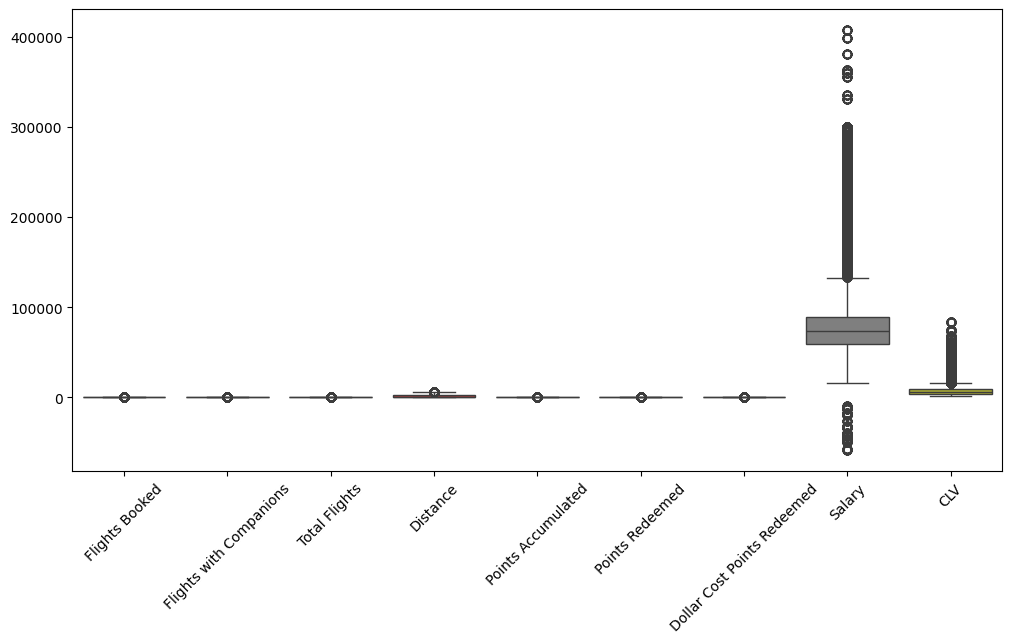

In [63]:
# Boxplots para ver outliers por variable
plt.figure(figsize=(12,6))
sns.boxplot(data=df_merged[cols_num])
plt.xticks(rotation=45)
plt.show()

Que haya muchos outliers en Distance, Salary y CLV indica dos cosas posibles: mezcla de perfiles muy distintos (DISTANCE:clientela que tiene muy poca actividad =0 y muy pocos que son frequent flyers = vuelan mucho y muy lejos) y/o problemas de calidad de datos (SALARY: valores negativos o extremadamente altos pueden indicar errores de captura...). 
En el caso de CLV: es normal que pocos clientes tengan un valor muy alto porque significa un segmento pequeño de clientes "VIP" (=mucho gasto, mucha retencion, fidelidad...)